# CSS Bootcamp

## Day 1 (NHST): Lab

This lab is intended to accompany **Day 1** of the week on **Statistics**, which focuses on:

- Basic descriptive statistics  
- Sampling error and the Central Limit Theorem  

This lab has some "free response" questions, in which you are asked to describe or make some inference from a graph. 

It also has questions requiring you to program answers in Python. In some cases, this will use built-in functions we've discussed in class (either today, or previous weeks). In others, there'll be a built-in function that we *haven't* discussed, which you will have to look up in the documentation. And in other cases, you'll be asked to write an original function.

Please reach out for help if anything is unclear!

#### Key imports

Here, we import some of the libraries that will be critical for the lab.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import scipy.stats as ss
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

We're also going to be working with one of the datasets found in `seaborn`.

In [3]:
df_tips = sns.load_dataset("tips")
df_tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


## Part 1: Descriptive Statistics

In this section, you'll plot data, then calculate basic descriptive statistics for different sets of observations.

### 1A. Plotting data

##### Plot the distribution of tip amounts from the `df_tips` dataframe (the correct column is `tip`).

In [4]:
#### Your code here

<AxesSubplot:xlabel='tip', ylabel='Count'>

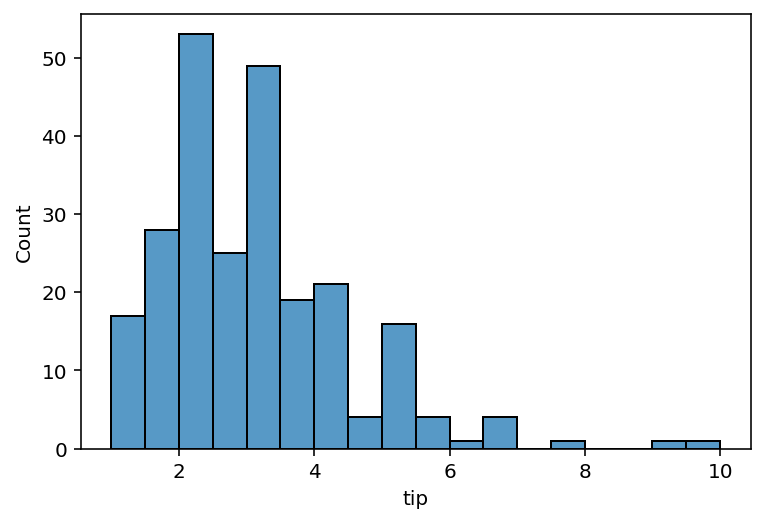

In [5]:
sns.histplot(df_tips['tip'])

##### How would you describe the **shape** of this distribution? Is it normal or skewed? If skewed, in what direction?

In [6]:
#### Your response here

##### Create a new variable, called `tip_pct`. This is the `tip` amount divided by the `total_bill` amount

In [7]:
#### Your code here

In [8]:
df_tips['tip_pct'] = df_tips['tip'] / df_tips['total_bill']

##### Now plot a histogram of this variable. Is it normal or skewed? If skewed, in what direction?

In [9]:
#### Your code here

<AxesSubplot:xlabel='tip_pct', ylabel='Count'>

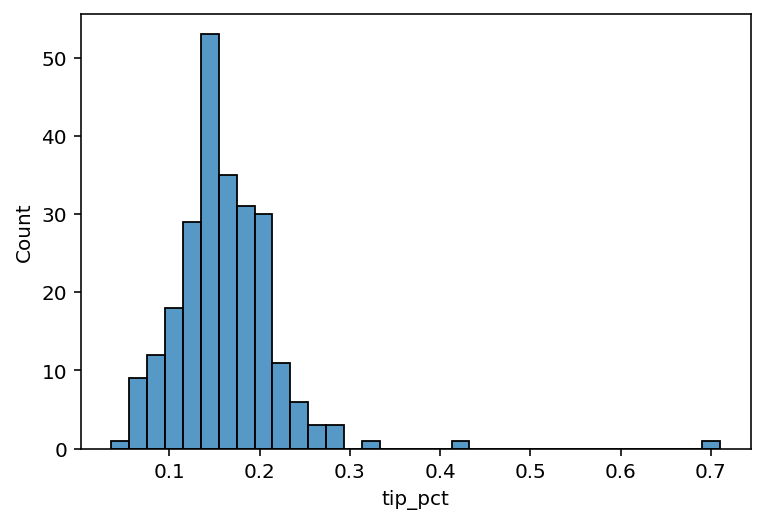

In [10]:
sns.histplot(df_tips['tip_pct'])

### 1B. Central Tendency

##### What is the `mean` tip proportion (`tip_pct`)?

In [11]:
#### Your code here

In [12]:
df_tips['tip_pct'].mean()

0.16080258172250478

##### What is the `median` tip proportion (`tip_pct`)?

In [13]:
#### Your code here

In [14]:
df_tips['tip_pct'].median()

0.15476977125802577

##### What's higher, the mean or the median? Explain why, using the graph of `tip_pct` from above as justification.

In [15]:
#### Your response here

##### Plot the distribution of `tip_pct` values again, this time with a dotted vertical line representing the `mean` proportion.

In [16]:
#### Your code here

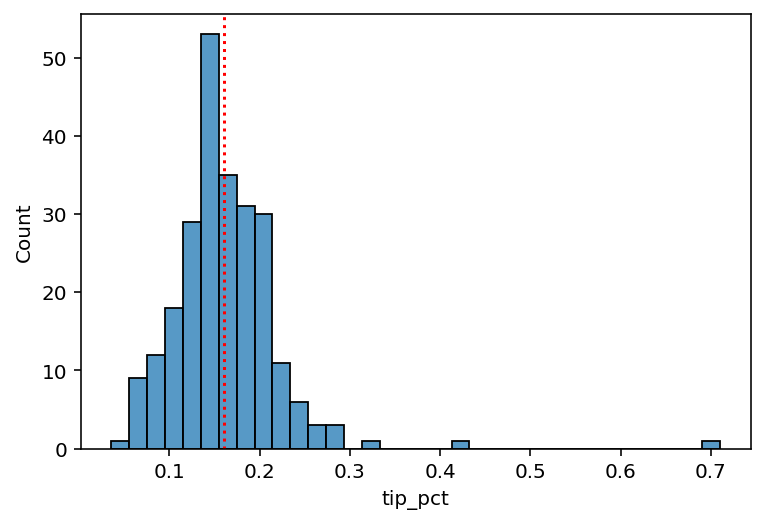

In [17]:
sns.histplot(df_tips['tip_pct'])
plt.axvline(x = df_tips['tip_pct'].mean(), linestyle="dotted", color = "red")

### 1C. Dispersion

##### What is the minimum and maximum tip proportion (`tip_pct`)?

In [18]:
#### Your code here

In [19]:
df_tips['tip_pct'].max()

0.710344827586207

In [20]:
df_tips['tip_pct'].min()

0.03563813585135547

##### Calculate the distribution of squared errors for `tip_pct`

The formula is as follows:

$\epsilon = (x_i - \mu)^2$

Where $\mu$ is the mean of $x$, and each $x_i$ is one of the observations of $x$.

In [21]:
#### Your code here

In [22]:
errors = (df_tips['tip_pct'] - df_tips['tip_pct'].mean())**2

##### Create a scatterplot comparing the `squared error` (y-axis) for a given datapoint to the original `tip_pct` (x-axis).

**Hint**: You can use `sns.scatterplot`, e.g.,:

```
sns.scatterplot(x = ...,
                y = ...)
```

In [23]:
#### Your code here

Text(0, 0.5, 'MSE')

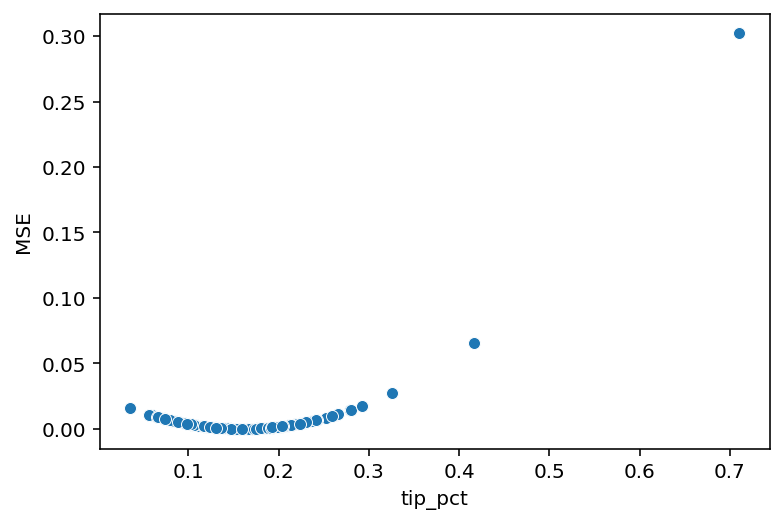

In [24]:
sns.scatterplot(x = df_tips['tip_pct'],
                y = errors)
plt.ylabel("MSE")

##### Write a function to calculate sample standard deviation of an input vector `x`.

In [27]:
#### Starter function
def calculate_sample_sd(x):
    """Calculate sample standard deviation of x. Assume x is a numpy array or pd.Series"""
    #### Your code here
    pass

In [28]:
def calculate_sample_sd(x):
    """Calculate sample standard deviation of x. Assume x is a numpy array or pd.Series"""
    error = (x - x.mean())**2
    return math.sqrt(error.sum()/(len(x) - 1))

##### Compare the output of your function to calling `std` on the `tip_pct` column of the `pandas` dataframe.

In [29]:
#### Your code here

In [30]:
df_tips['tip_pct'].std()

0.061072204191571944

In [31]:
calculate_sample_sd(df_tips['tip_pct'])

0.06107220419157193

##### Convert the values in `tip_pct` to z-scores.

Recall that a **z-score** is defined as:

$Z = \frac{x - \mu}{\sigma}$

Where:

- $mu$ = mean of distribution  
- $\sigma$ = standard deviation of distribution

In [32]:
#### Your code here

In [33]:
Z_tip = (df_tips['tip_pct'] - df_tips['tip_pct'].mean())/df_tips['tip_pct'].std()

##### Plot a histogram of those z-scores.

In [34]:
#### Your code here

Text(0.5, 0, 'Z (Tip %)')

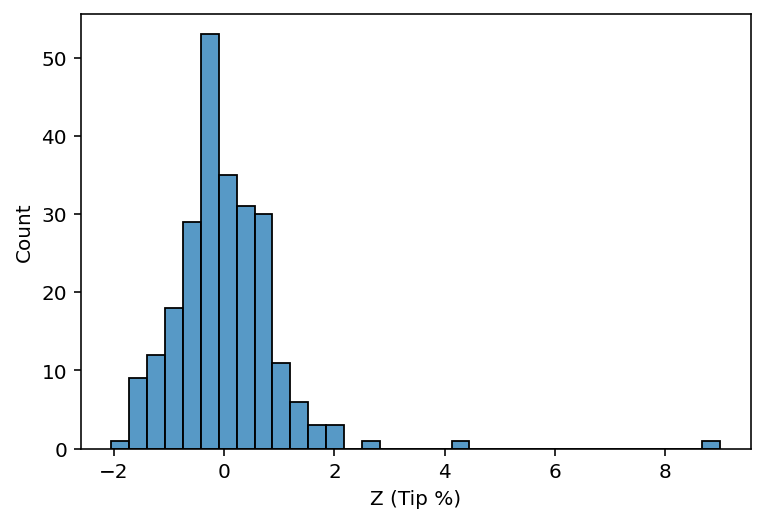

In [35]:
sns.histplot(Z_tip)
plt.xlabel("Z (Tip %)")

### 1D. Standard error

##### What is the standard error of `tip_pct`?

In [34]:
#### Your code here

In [43]:
sd = np.std(df_tips['tip_pct'], ddof=1)
sem = sd/np.sqrt(np.size(df_tips['tip_pct']))
sem

0.003909747237656802

##### Calculate the 95% confidence interval around the mean of `tip_pct`.  (Round each number to three decimal places.)

In [52]:
#### Your code here

In [53]:
MEAN = round(df_tips['tip_pct'].mean(), 3)
z = 1.96
ci_lower = round(MEAN - z*sem, 3)
ci_upper = round(MEAN + z*sem, 3)

print("Mean Tip % is {m}, [{l}, {h}]".format(m=MEAN, l = ci_lower, h = ci_upper))

Mean Tip % is 0.161, [0.153, 0.169]


## Part 2: Sampling Error and CLT

Now that you've had some practice with basic descriptive statistics, we'll put them into action as we tackle **inferential statistics**.

The notion of **sampling error** is at the heart of inferential statistics. We can almost never observe an entire population of interest, so we rely on random, representative samples instead. Using these samples, we calculate **sample statistics**, which we use to try to *estimate* the underlying **population parameter**.

### 2A. Sampling

##### Use `numpy.random.choice` to take a random sample of size 10 of the `tip_pct` column.

**Note (1)**: Set `replace = False` to make sure you don't sample the same observation twice.

**Note (2)**: You can also sample directly from the `pandas` column using the [`sample` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

In [54]:
#### Your code here

In [55]:
tip_sample = np.random.choice(df_tips['tip_pct'], size = 10, replace = False)

##### Calculate the mean of this sample.

In [56]:
#### Your code here

In [57]:
tip_sample.mean()

0.1505247024647073

##### How does this compare to the true mean of the distribution? Is it equal? Larger or smaller?

**Note**: Try running the *sample* multiple times to get an intuitive sense for how much this value varies.

In [58]:
#### Your response here

##### Calculate the root mean squared error (RMSE) of one of these sample means with respect to the true mean.

MSE is defined as:

$\epsilon = \sqrt{(\bar{x} - \mu)^2}$

Where $\mu$ is the true mean, and $\bar{x}$ is the mean of our sample.

In [59]:
#### Your response here

In [60]:
math.sqrt((tip_sample.mean() - df_tips['tip_pct'].mean())**2)

0.010277879257797468

### 2B. Sampling error

##### Now write a function to take `N` samples of size `size` from an input vector `x` (without replacement), and return the distribution of sample means.

In [63]:
#### Starter function
def sampling_distribution(x, N, size):
    """Take N samples from x of size 'size', and calculate the mean of each sample."""
    #### Your code here
    pass

In [64]:
#### Starter function
def sampling_distribution(x, N, size):
    """Take N samples from x of size 'size', and calculate the mean of each sample."""
    sample_means = []
    for i in range(N):
        sample = np.random.choice(x, size = size, replace = False)
        sample_means.append(sample.mean())
    
    return np.array(sample_means)

##### Use this function to take 50 samples of size 20 from `tip_pct`. What's the mean of this distribution of sample means?

In [65]:
#### Your code here

In [66]:
sm = sampling_distribution(df_tips['tip_pct'], N = 50, size = 20)
sm.mean()

0.1607712214286985

##### Create a histogram of these sample means. Plot the true population mean as a vertical line.

In [71]:
#### Your code here

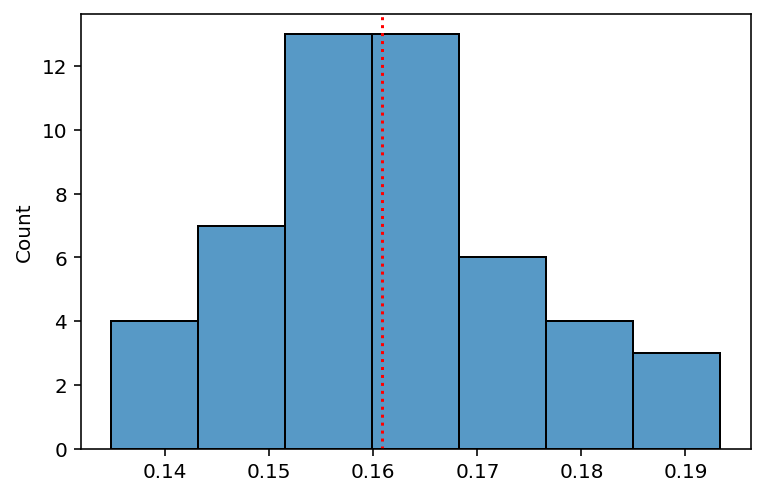

In [72]:
sns.histplot(sm)
plt.axvline(x = df_tips['tip_pct'].mean(), linestyle = "dotted", color = "red")

### This next problem will involve multiple steps.

Steps:

1. Use a `for` loop to iterate through each size from the `sample_sizes` list below. These are our **sample sizes**.
2. For each **sample size**, take **50** samples of that size from `tip_pct` (using the `sampling_distribution`) function you've just defined).  
3. For each of those sampling distributions, calculate the RMSE between the *mean* of that sampling distribution and the true mean of `tip_pct`.  
4. Store all these RMSE values in a list. 

In [75]:
sample_sizes = list(range(1, 151))
max(sample_sizes)

150

In [76]:
#### Your code here

In [77]:
avg_error = []
for size in sample_sizes:
    sm = sampling_distribution(df_tips['tip_pct'], N = 50, size = size)
    error = math.sqrt((sm.mean() - df_tips['tip_pct'].mean())**2)
    avg_error.append(error)

##### Create a `scatterplot` comparing `sample_sizes` to `avg_error`. 

In [78]:
#### Your code here

Text(0, 0.5, 'RMSE')

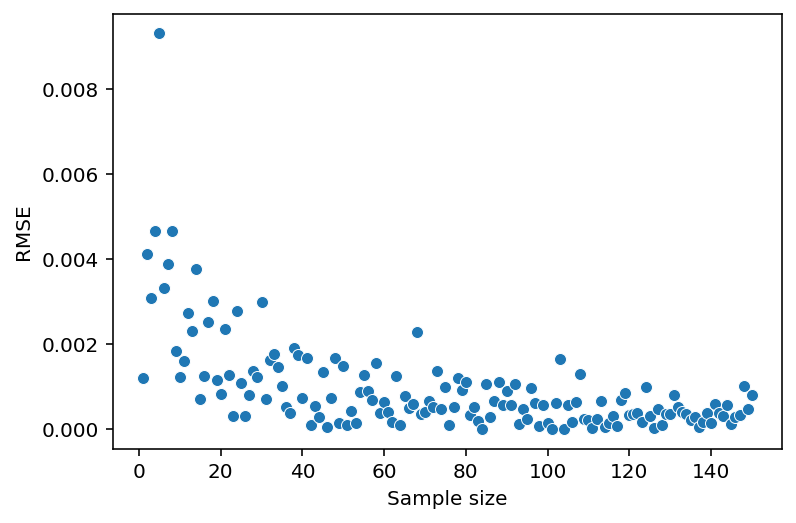

In [79]:
sns.scatterplot(x = sample_sizes,
               y = avg_error)
plt.xlabel("Sample size")
plt.ylabel("RMSE")

##### What do you notice? Is there a trend here at all?

In [81]:
#### Your response here

### 2C. Central Limit Theorem

Now we're going to apply these insights to several different distributions (and distribution shapes).

##### First, consider this highly right-skewed distribution.

<AxesSubplot:ylabel='Count'>

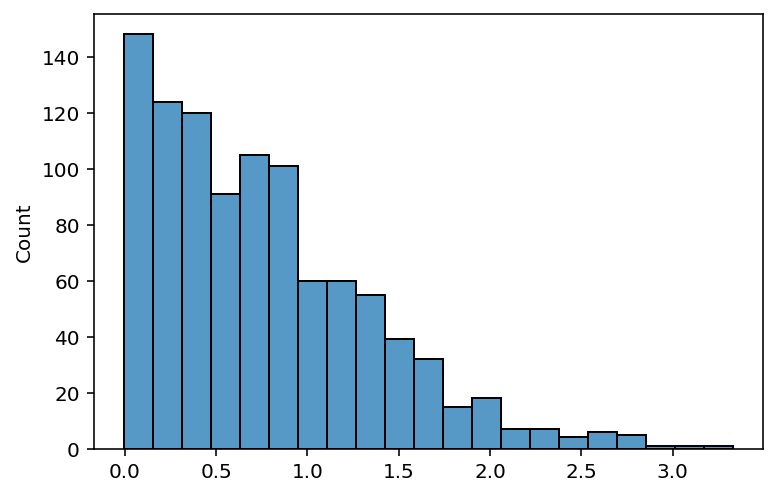

In [82]:
obs_skewed = ss.skewnorm.rvs(100, size = 1000)
sns.histplot(obs_skewed)

##### Use your `sampling_distribution` function to create a distribution of sample means: `50` samples of size `1`. Create a histogram of this distribution.

In [83]:
#### Your code here

<AxesSubplot:ylabel='Count'>

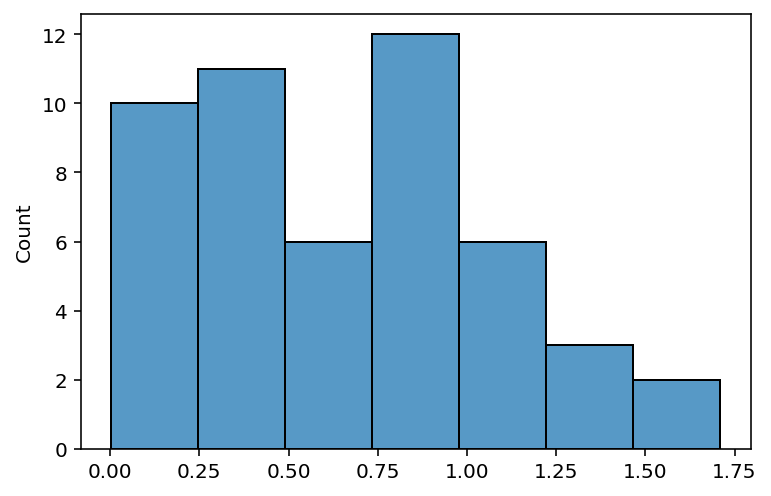

In [84]:
sm = sampling_distribution(obs_skewed, N = 50, size = 1)
sns.histplot(sm)

##### Use your `sampling_distribution` function to create a distribution of sample means: `50` samples of size `10`. Create a histogram of this distribution.

In [85]:
#### Your code here

<AxesSubplot:ylabel='Count'>

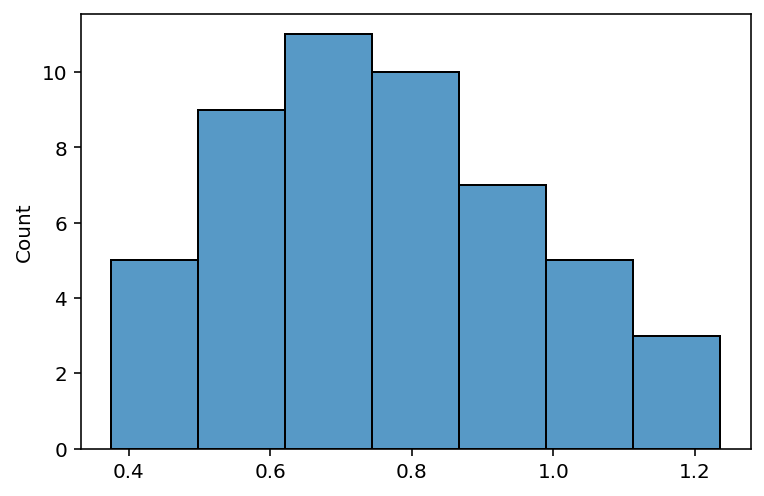

In [86]:
sm = sampling_distribution(obs_skewed, N = 50, size = 10)
sns.histplot(sm)

##### Use your `sampling_distribution` function to create a distribution of sample means: `50` samples of size `20`. Create a histogram of this distribution.

In [87]:
#### Your code here

<AxesSubplot:ylabel='Count'>

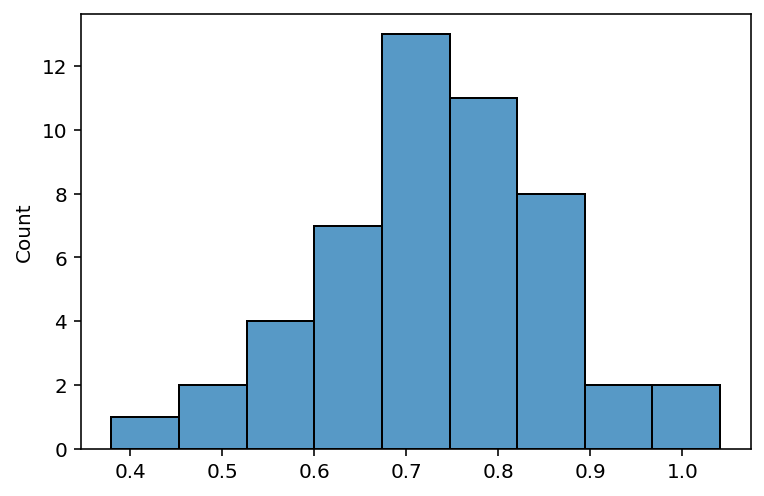

In [88]:
sm = sampling_distribution(obs_skewed, N = 50, size = 20)
sns.histplot(sm)

##### What do you notice about these distributions of sample means? 

As you write your answer, think about both:

1. The **shape** of the distribution of sample means.  
2. The **variance** of the distribution of sample means.

In [89]:
#### Your response here

##### How does this relate to the `RMSE ~ sample_size` plot we looked at earlier?

In [90]:
#### Your response here

### Congratulations!

These insights are the conceptual foundation of the **Central Limit Theorem**.